In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
import matplotlib as mpl
from util.stragglers import *
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
MPIcppComet    = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/UpTo32Nodes/comet_mpic++_NoIOstrong.csv').drop(['Framework'],axis=1)
SparkComet     = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/UpTo32Nodes/comet_spark_NoIOstrong.csv').drop(['Framework'],axis=1)
MPI4pyComet    = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/UpTo32Nodes/comet_mpi4py_NoIOstrong.csv').drop(['Framework'],axis=1)
DaskComet      = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/UpTo32Nodes/comet_dask_NoIOstrong.csv').drop(['Framework'],axis=1)

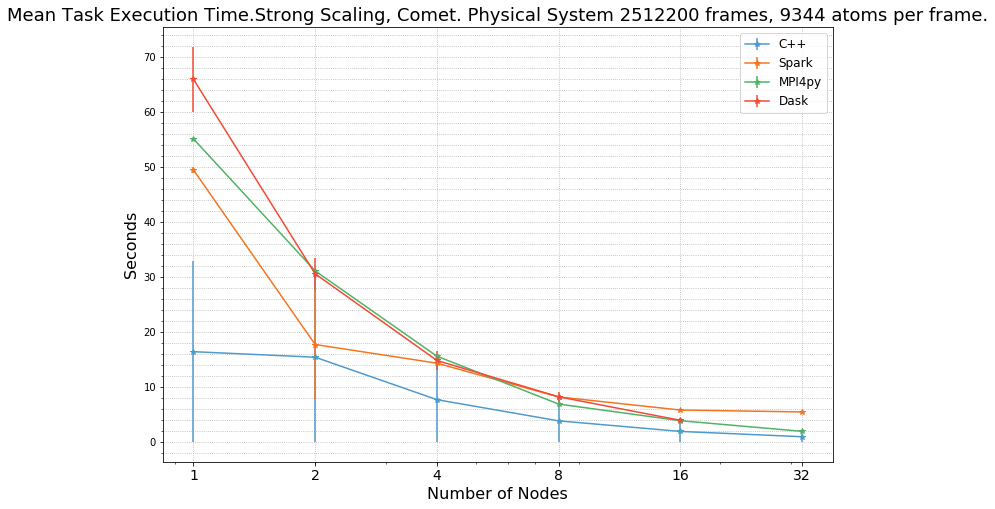

In [3]:
coeffCMPIcpp = task_centers(MPIcppComet,nodes=[1,2,4,8,16,32],measure='mean')
coeffCSpark  = task_centers(SparkComet,nodes=[1,2,4,8,16,32],measure='mean')
coeffCMPI4py = task_centers(MPI4pyComet,nodes=[1,2,4,8,16,32],measure='mean')
coeffCDask   = task_centers(DaskComet,nodes=[1,2,4,8,16],measure='mean')

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes.errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in coeffCMPIcpp],yerr=[np.std(D)/1000000.0 for D in coeffCMPIcpp],color=blues(150),marker='*',label='C++')
axes.errorbar([1,2,4,8,16,32],[np.mean(D)/1000.0 for D in coeffCSpark],yerr=[np.std(D)/1000.0 for D in coeffCSpark],color=oranges(150),marker='*',label='Spark')
axes.errorbar([1,2,4,8,16,32],[np.mean(D)/1.0 for D in coeffCMPI4py],yerr=[np.std(D)/1.0 for D in coeffCMPI4py],color=greens(150),marker='*',label='MPI4py')
axes.errorbar([1,2,4,8,16],[np.mean(D)/1000.0 for D in coeffCDask],yerr=[np.std(D)/1000.0 for D in coeffCDask],color=reds(150),marker='*',label='Dask')
axes.set_title('Mean Task Execution Time.Strong Scaling, Comet. Physical System 2512200 frames, 9344 atoms per frame.',fontsize=18)
axes.set_xlabel('Number of Nodes',fontsize=16)
axes.set_ylabel('Seconds',fontsize=16)
axes.set_xscale(value='log')
axes.minorticks_on()
axes.grid('on',linestyle=':')
axes.grid(axis='y',which='minor', linestyle=':')
axes.set_xticks([1,2,4,8,16,32])
axes.set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes.legend(fontsize=12)

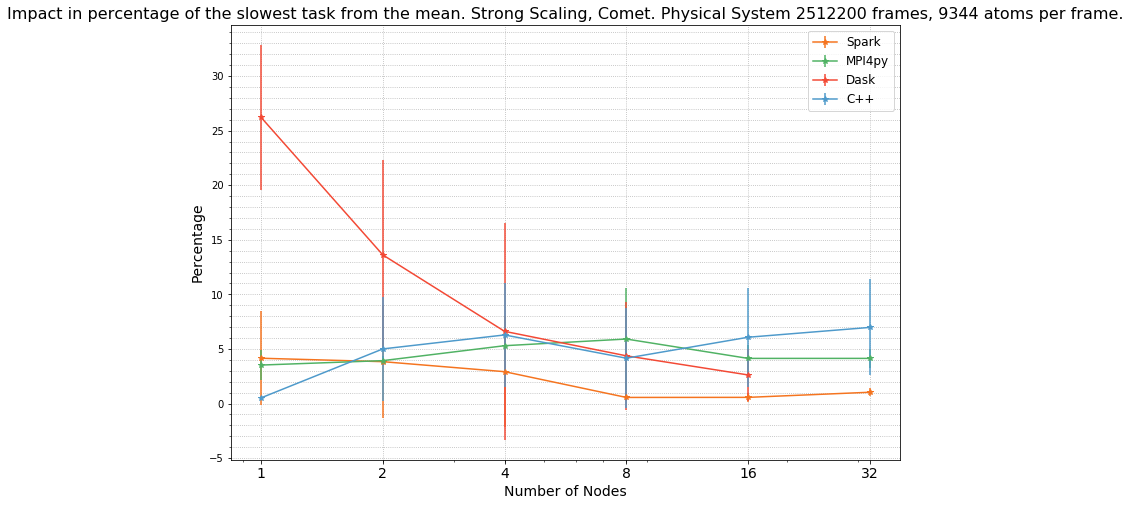

In [4]:
impactCSpark  = slowest_impact(SparkComet,nodes=[1,2,4,8,16,32],center='mean')
impactCMPI4py = slowest_impact(MPI4pyComet,nodes=[1,2,4,8,16,32],center='mean')
impactCDask   = slowest_impact(DaskComet,nodes=[1,2,4,8,16],center='mean')
impactCCpp    = slowest_impact(MPIcppComet,nodes=[1,2,4,8,16,32],center='mean')

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes.errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCSpark],yerr=[np.std(D)*100 for D in impactCSpark],color=oranges(150),marker='*',label='Spark')
axes.errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCMPI4py],yerr=[np.std(D)*100 for D in impactCMPI4py],color=greens(150),marker='*',label='MPI4py')
axes.errorbar([1,2,4,8,16],[np.mean(D)*100 for D in impactCDask],yerr=[np.std(D)*100 for D in impactCDask],color=reds(150),marker='*',label='Dask')
axes.errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCCpp],yerr=[np.std(D)*100 for D in impactCCpp],color=blues(150),marker='*',label='C++')
axes.set_ylabel('Percentage',fontsize=14)
axes.set_xscale(value='log')
axes.minorticks_on()
axes.grid('on',linestyle=':')
axes.grid(axis='y',which='minor', linestyle=':')
axes.set_xticks([1,2,4,8,16,32])
axes.set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes.set_xlabel('Number of Nodes',fontsize=14)
axes.set_title('Impact in percentage of the slowest task from the mean. Strong Scaling, Comet. Physical System 2512200 frames, 9344 atoms per frame.',fontsize=16)
axes.legend(fontsize=12)

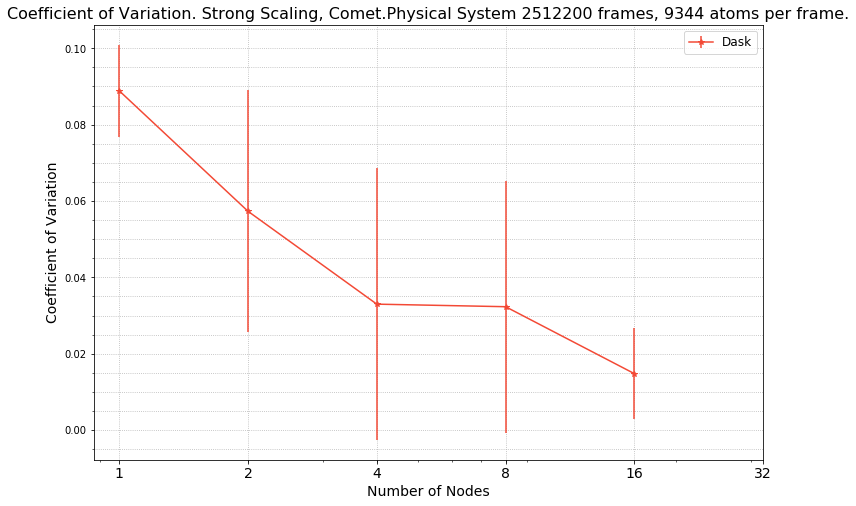

In [6]:
coeffCSpark  = task_coeff(SparkComet,nodes=[1,2,4,8,16,32])
coeffCMPI4py = task_coeff(MPI4pyComet,nodes=[1,2,4,8,16,32])
coeffCDask   = task_coeff(DaskComet,nodes=[1,2,4,8,16,32])
coeffCMPIcpp = task_coeff(MPIcppComet,nodes=[1,2,4,8,16,32])

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

#axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCSpark],yerr=[np.std(D) for D in coeffCSpark],color=oranges(150),marker='*',label='Spark')
#axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPI4py],yerr=[np.std(D) for D in coeffCMPI4py],color=greens(150),marker='*',label='MPI4py')
axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCDask],yerr=[np.std(D) for D in coeffCDask],color=reds(150),marker='*',label='Dask')
#axes.errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCMPIcpp],yerr=[np.std(D) for D in coeffCMPIcpp],color=blues(150),marker='*',label='C++')
axes.set_ylabel('Coefficient of Variation',fontsize=14)
axes.set_xscale(value='log')
axes.minorticks_on()
axes.grid('on',linestyle=':')
axes.grid(axis='y',which='minor', linestyle=':')
axes.set_xticks([1,2,4,8,16,32])
axes.set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes.set_xlabel('Number of Nodes',fontsize=14)
axes.set_title('Coefficient of Variation. Strong Scaling, Comet.Physical System 2512200 frames, 9344 atoms per frame.',fontsize=16)
axes.legend(fontsize=12)